# Модель Изинга

## Точка Кюри

1. Возьмём случайную температуру в у.е., к примеру,  $T = 3.0$. Запустим при них код при 100.000 шагов Монте-Карло и построим графики средней намагниченности и суммарной энергии от времени.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

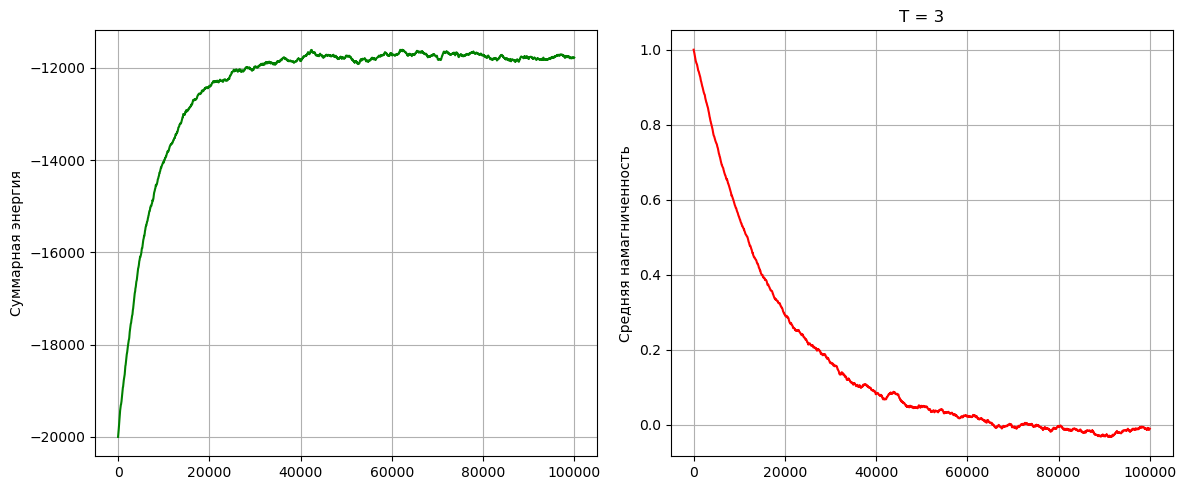

In [138]:
df = pd.read_csv('data3.0.csv')
n = df['n']
E = df['E']
M = df['M']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца
plt.title('T = 3')

axs[0].grid(True)
axs[0].plot(df['n'], df['E'], color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[1].grid(True)
axs[1].plot(df['n'], df['M'], color='r')
axs[1].set_ylabel('Средняя намагниченность')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Как видно, для  $T = 3.0$ стационарная ситуация достигается на $\approx 70.000$ шагов. \
Попробуем теперь 150.000 шагов для $T = 2.0$ и $T = 9.0$

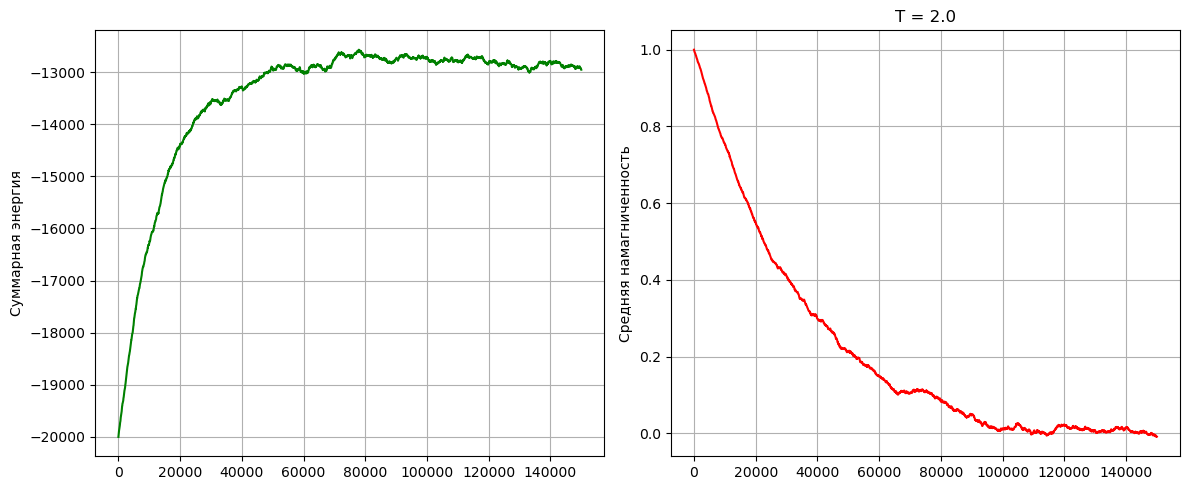

In [139]:
df = pd.read_csv('data2.0.csv')
n = df['n']
E = df['E']
M = df['M']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца
plt.title('T = 2.0')

axs[0].grid(True)
axs[0].plot(df['n'], df['E'], color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[1].grid(True)
axs[1].plot(df['n'], df['M'], color='r')
axs[1].set_ylabel('Средняя намагниченность')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

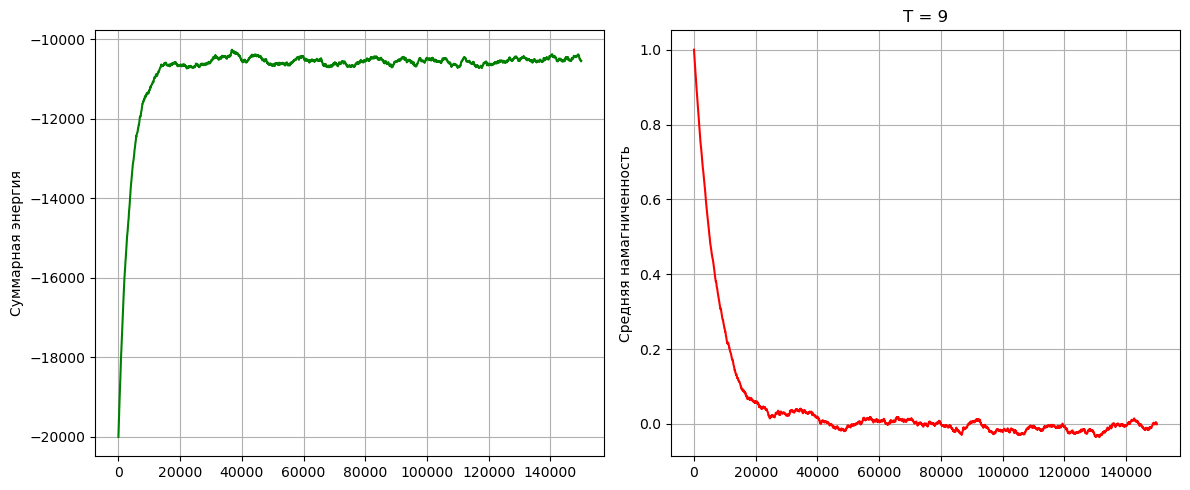

In [140]:
df = pd.read_csv('data9.0.csv')
n = df['n']
E = df['E']
M = df['M']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца
plt.title('T = 9')

axs[0].grid(True)
axs[0].plot(df['n'], df['E'], color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[1].grid(True)
axs[1].plot(df['n'], df['M'], color='r')
axs[1].set_ylabel('Средняя намагниченность')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Очевидно, для более низких температур установление равновесия требует бОльшего числа шагов. 

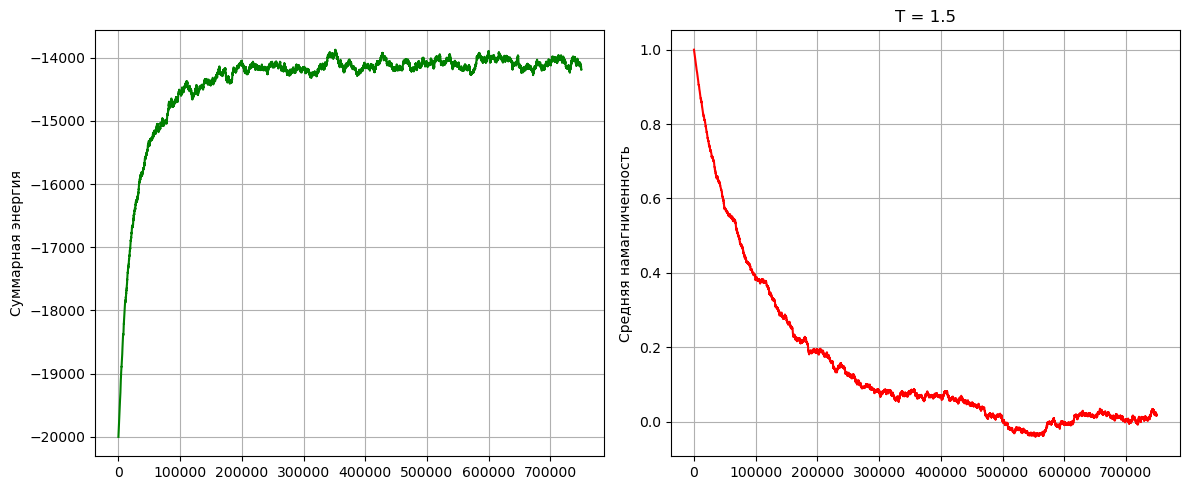

In [141]:
df = pd.read_csv('data1.5.csv')
n = df['n']
E = df['E']
M = df['M']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца
plt.title('T = 1.5')

axs[0].grid(True)
axs[0].plot(df['n'], df['E'], color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[1].grid(True)
axs[1].plot(df['n'], df['M'], color='r')
axs[1].set_ylabel('Средняя намагниченность')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

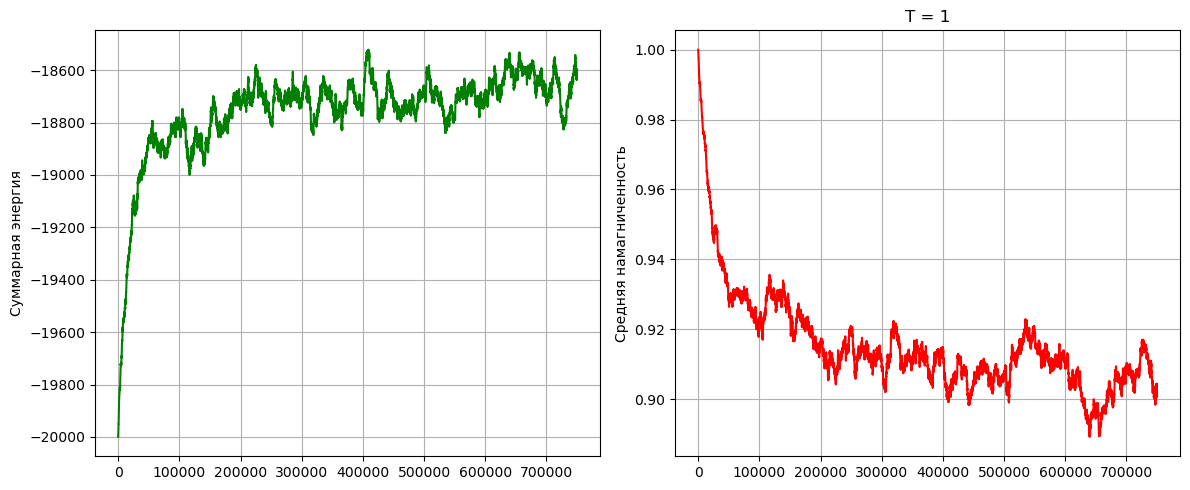

In [142]:
df = pd.read_csv('data1.csv')
n = df['n']
E = df['E']
M = df['M']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца
plt.title('T = 1')

axs[0].grid(True)
axs[0].plot(df['n'], df['E'], color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[1].grid(True)
axs[1].plot(df['n'], df['M'], color='r')
axs[1].set_ylabel('Средняя намагниченность')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Что ж, очевидно где-то в районе $T = 1.5$ и находится точка Кюри, ведь для $T=1$ равновесие явно при ненулевой намагниченности. \
Попробуем теперь установить её построением графика средней намагниченности от температуры. Для честности эксперимента, возьмём 800.000 шагов и усредним последние 300.000 шагов. Возьмём температуры в промежутке от 0.4 до 5.0 с шагом в 0.1

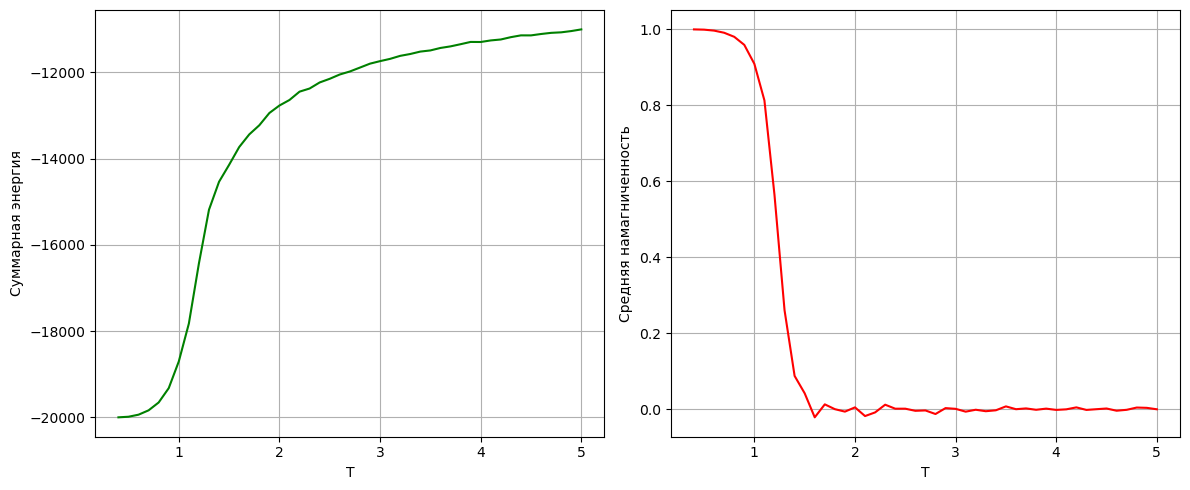

In [143]:
mean_E = []
mean_M = []
mean_squared_E = []
mean_squared_M = []

T = []

for i in np.arange(0.4, 5.1, 0.1):
    t = round(i, 1)
    T.append(t)
    df = pd.read_csv(f'curie_data{t}.csv')
    E = df['E']
    M = df['M']

    e = np.mean(E)
    m = np.mean(M)
    mean_squared_e = np.mean(E**2)
    mean_squared_m = np.mean(M**2)

    mean_E.append(e)
    mean_M.append(m)
    mean_squared_E.append(mean_squared_e)
    mean_squared_M.append(mean_squared_m)

mean_E = np.array(mean_E)
mean_M = np.array(mean_M)
mean_squared_E = np.array(mean_squared_E)
mean_squared_M = np.array(mean_squared_M)
T = np.array(T)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца

axs[0].grid(True)
axs[0].plot(T, mean_E , color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[0].set_xlabel('T')

axs[1].grid(True)
axs[1].plot(T, mean_M, color='r')
axs[1].set_ylabel('Средняя намагниченность')
axs[1].set_xlabel('T')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Точка Кюри где-то в промежутке от 1 до 1.5 у.е. температуры. Для уточнения, посмотрим промежуток от 1.0 до 1.5 с шагом 0.05. Так же на всякий случай увеличим количество шагом до 1.500.000, усредняя последние 500.000.

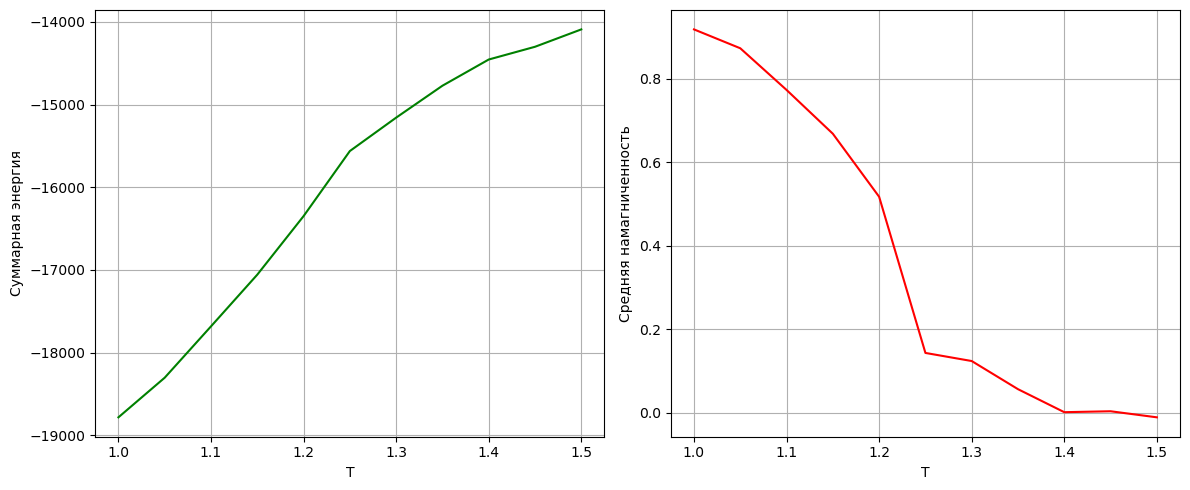

In [144]:
mean_E1 = []
mean_M1 = []
T1 = []

for i in np.arange(1.0, 1.55, 0.05):
    t = round(i, 2)
    T1.append(t)
    df = pd.read_csv(f'new_curie_data{t}.csv')
    E1 = df['E']
    M1 = df['M']

    e = np.mean(E1)
    m = np.mean(M1)
    mean_E1.append(e)
    mean_M1.append(m)

mean_E1 = np.array(mean_E1)
mean_M1 = np.array(mean_M1)
T1 = np.array(T1)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца

axs[0].grid(True)
axs[0].plot(T1, mean_E1 , color='g')
axs[0].set_ylabel('Cуммарная энергия')
axs[0].set_xlabel('T')

axs[1].grid(True)
axs[1].plot(T1, mean_M1, color='r')
axs[1].set_ylabel('Средняя намагниченность')
axs[1].set_xlabel('T')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Ну, идеальный ноль начинается с 1.4, однако, очевидно, точка Кюри находится в промежутке от 1.25 до 1.35. 

$T_C = 1.30 \pm 0.05$

## Теплоёмкость

Для начала воспользуемся формулой $C = \dfrac{<E^2> - <E>^2}{k_B T}$

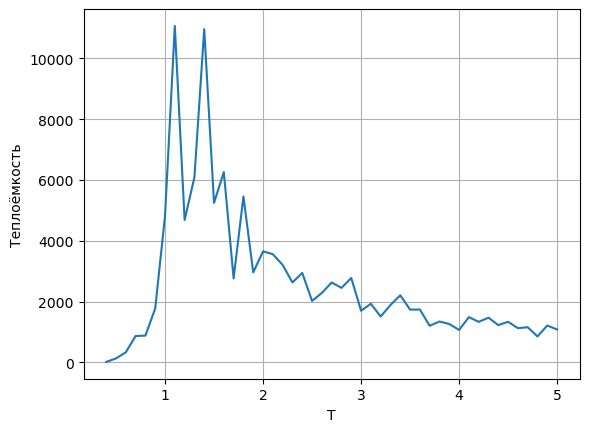

In [145]:
C = (mean_squared_E - mean_E**2)/T

plt.plot(T, C)
plt.xlabel('T')
plt.ylabel('Теплоёмкость')
plt.grid(True)
plt.show()


А теперь посчитаем $C = \dfrac{dE}{dT}$

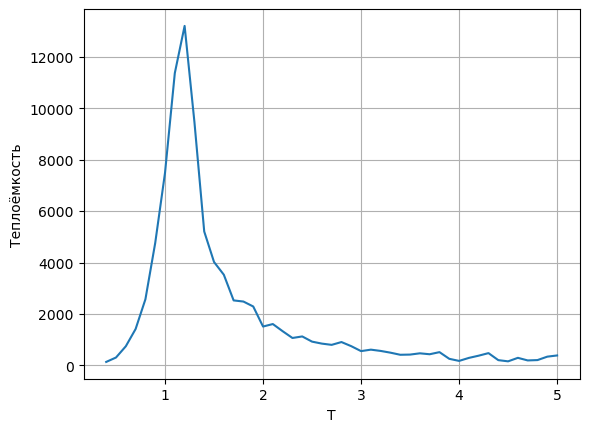

In [147]:
C = np.gradient(mean_E, T)

plt.plot(T, C)
plt.xlabel('T')
plt.ylabel('Теплоёмкость')
plt.grid(True)
plt.show()

Как видим, графики очень похожи.

## Магнитная восприимчивость

Посчитаем намагниченность по формуле $\chi = \dfrac{<M^2> - <M>^2}{k_B T}$

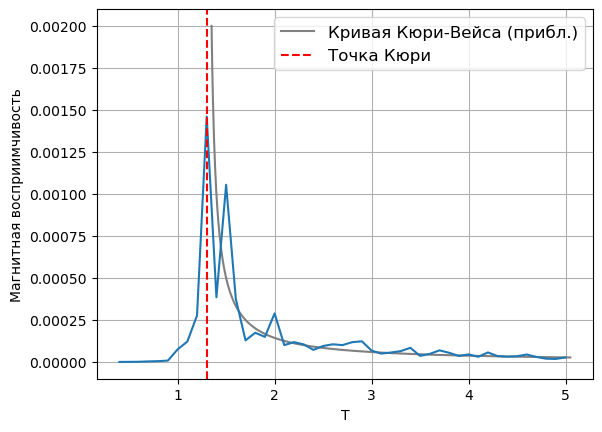

In [164]:
xi = (mean_squared_M - mean_M**2)/T
ti = np.linspace(1.35, 5.05, 1000)
xti = 0.0001/(ti - 1.3)

plt.plot(ti, xti, color='gray', linestyle='-', label='Кривая Кюри-Вейса (прибл.)')
plt.plot(T, xi)
plt.xlabel('T')
plt.axvline(x=1.3, color='r', linestyle='--', label='Точка Кюри')  # Красная пунктирная линия
plt.ylabel('Магнитная восприимчивость')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()
